In [1]:
import graphlab

## Import some data

In [2]:
# table 1
sales = graphlab.SFrame('home_data.gl/')

[INFO] This non-commercial license of GraphLab Create is assigned to lucas.oliveira.cotta@gmail.comand will expire on September 25, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-6559 - Server binary: /usr/local/lib/python2.7/dist-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1443752101.log
[INFO] GraphLab Server Version: 1.6.1


In [3]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


## Exploring data with canvas

In [5]:
# plotting inside of the notebook itself
graphlab.canvas.set_target('ipynb')

sales.show(view="Scatter Plot", x="sqft_living", y="price")

## Create simple regression model

In [6]:
# Split data in trainning and test
# 80% trainning, 20% test
# It's interesting to set a seed to the random function

trainning_data, test_data = sales.random_split(.8, seed=0)

## Building the regression model

In [7]:
# Inputs = data(x), target (y'), features of the model (default = all features)
sqft_model = graphlab.linear_regression.create(trainning_data, target='price', features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 16530
PROGRESS: Number of features          : 1
PROGRESS: Number of unpacked features : 1
PROGRESS: Number of coefficients    : 2
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | 1         | 2        | 1.004296     | 4341156.275138     | 1696665.

## Evaluation

In [9]:
# Average price of the data model
print test_data['price'].mean()

543054.042563


In [11]:
# root-mean-square error (RMSE) is a measure of the differences between sample and population values
print sqft_model.evaluate(test_data)

{'max_error': 4137091.1794019267, 'rmse': 255219.09937349832}


## Showing the prediction

In [13]:
import matplotlib.pyplot as plt

# To plot in the notebook it self
%matplotlib inline

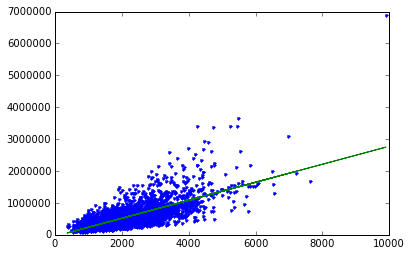

In [14]:
# x, y, draw format

# x', y', prediction, draw format
plt.plot(test_data['sqft_living'], test_data['price'], '.',
        test_data['sqft_living'], sqft_model.predict(test_data), '-')